## 1. Installation (Python 3.9.13)

In [2]:
!pip install --default-timeout=1000 tensorflow==2.8.0 tensorflow-gpu==2.8.0 opencv-python matplotlib

  Using cached tensorflow-2.8.0-cp39-cp39-win_amd64.whl.metadata (2.9 kB)
  Using cached tensorflow_gpu-2.8.0-cp39-cp39-win_amd64.whl.metadata (2.9 kB)
  Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached matplotlib-3.9.0-cp39-cp39-win_amd64.whl.metadata (11 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.5.4-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.11.0-cp39-cp39-win_amd64.whl.metadata (2.5 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl.metadata (1.9 kB)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached numpy-1.26.4-cp39-cp39-win_amd64.whl.metadata (61 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata

In [3]:
!pip uninstall protobuf -y
!pip install protobuf==3.20

Found existing installation: protobuf 5.26.1
Uninstalling protobuf-5.26.1:
  Successfully uninstalled protobuf-5.26.1
  Using cached protobuf-3.20.0-cp39-cp39-win_amd64.whl.metadata (699 bytes)
Using cached protobuf-3.20.0-cp39-cp39-win_amd64.whl (904 kB)


In [4]:
!pip list

Package                      Version
---------------------------- -------------------
absl-py                      2.1.0
asttokens                    2.4.1
astunparse                   1.6.3
cachetools                   5.3.3
certifi                      2024.2.2
charset-normalizer           3.3.2
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.2.1
cycler                       0.12.1
debugpy                      1.8.1
decorator                    5.1.1
exceptiongroup               1.2.1
executing                    2.0.1
flatbuffers                  24.3.25
fonttools                    4.51.0
gast                         0.5.4
google-auth                  2.29.0
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.63.0
h5py                         3.11.0
idna                         3.7
importlib_metadata           7.1.0
importlib_resources          6.4.0
ipykernel                    6.

In [567]:
import os
import cv2
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

### 1.1 Limit GPU Memory Growth

In [568]:
gpus = tf.config.experimental.list_physical_devices("GPU")

for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [569]:
tf.config.list_physical_devices("GPU")

[]

## 2. TensorFlow Object Detection API Installation

### 2.1 Protobuf Installation/Compilation and Install the Object Detection API

In [8]:
!cd models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install

        1 file(s) copied.
running build
running build_py
copying object_detection\protos\anchor_generator_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\argmax_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\bipartite_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_predictor_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\calibration_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\center_net_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\eval_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\flexible_grid_a

zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-39: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-39: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-39: module MAY be using inspect.stack
No local packages or working download links found for tensorflow-text~=2.16.1
error: Could not find suitable distribution for Requirement.parse('tensorflow-text~=2.16.1')


In [13]:
!pip uninstall tensorflow -y
!pip install tensorflow==2.15.0

Found existing installation: tensorflow 2.8.0
Uninstalling tensorflow-2.8.0:
  Successfully uninstalled tensorflow-2.8.0


You can safely remove it manually.


  Using cached tensorflow-2.15.0-cp39-cp39-win_amd64.whl.metadata (3.6 kB)
  Using cached tensorflow_intel-2.15.0-cp39-cp39-win_amd64.whl.metadata (5.1 kB)
  Using cached ml_dtypes-0.2.0-cp39-cp39-win_amd64.whl.metadata (20 kB)
  Using cached protobuf-4.25.3-cp39-cp39-win_amd64.whl.metadata (541 bytes)
  Using cached tensorboard-2.15.2-py3-none-any.whl.metadata (1.7 kB)
  Using cached tensorflow_estimator-2.15.0-py2.py3-none-any.whl.metadata (1.3 kB)
  Using cached keras-2.15.0-py3-none-any.whl.metadata (2.4 kB)
  Using cached google_auth_oauthlib-1.2.0-py2.py3-none-any.whl.metadata (2.7 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
Using cached tensorflow-2.15.0-cp39-cp39-win_amd64.whl (2.1 kB)
Using cached tensorflow_intel-2.15.0-cp39-cp39-win_amd64.whl (300.8 MB)
Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
Using cached ml_dtypes-0.2.0-cp39-cp39-win_amd64.whl (938 kB)
Using cached protobuf-4.25.3-cp39-cp39-win_amd64.whl (413 kB)
Using cac

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.16.0 requires gin-config, which is not installed.
tf-models-official 2.16.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.16.0 requires immutabledict, which is not installed.
tf-models-official 2.16.0 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.16.0 requires oauth2client, which is not installed.
tf-models-official 2.16.0 requires opencv-python-headless, which is not installed.
tf-models-official 2.16.0 requires py-cpuinfo>=3.3.0, which is not installed.
tf-models-official 2.16.0 requires pyyaml>=6.0.0, which is not installed.
tf-models-official 2.16.0 requires sentencepiece, which is not installed.
tf-models-official 2.16.0 requires seqeval, which is not i

In [15]:
!pip uninstall protobuf -y
!pip install protobuf==3.20

Found existing installation: protobuf 4.25.3
Uninstalling protobuf-4.25.3:
  Successfully uninstalled protobuf-4.25.3

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.56.0 requires cloudpickle~=2.2.1, which is not installed.
apache-beam 2.56.0 requires crcmod<2.0,>=1.7, which is not installed.
apache-beam 2.56.0 requires dill<0.3.2,>=0.3.1.1, which is not installed.
apache-beam 2.56.0 requires fastavro<2,>=0.23.6, which is not installed.
apache-beam 2.56.0 requires fasteners<1.0,>=0.3, which is not installed.
apache-beam 2.56.0 requires hdfs<3.0.0,>=2.1.0, which is not installed.
apache-beam 2.56.0 requires httplib2<0.23.0,>=0.8, which is not installed.
apache-beam 2.56.0 requires js2py<1,>=0.74, which is not installed.
apache-beam 2.56.0 requires jsonpickle<4.0.0,>=3.0.0, which is not installed.
apache-beam 2.56.0 requires jsonschema<5.0.0,>=4.0.0, which is not installed.
apache-beam 2.56.0 requires objsize<0.8.0,>=0.6.1, which is not installed.
apache-beam 2.56.


  Using cached protobuf-3.20.0-cp39-cp39-win_amd64.whl.metadata (699 bytes)
Using cached protobuf-3.20.0-cp39-cp39-win_amd64.whl (904 kB)


In [19]:
!pip install pyyaml

  Using cached PyYAML-6.0.1-cp39-cp39-win_amd64.whl.metadata (2.1 kB)
Using cached PyYAML-6.0.1-cp39-cp39-win_amd64.whl (152 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.16.0 requires gin-config, which is not installed.
tf-models-official 2.16.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.16.0 requires immutabledict, which is not installed.
tf-models-official 2.16.0 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.16.0 requires oauth2client, which is not installed.
tf-models-official 2.16.0 requires opencv-python-headless, which is not installed.
tf-models-official 2.16.0 requires py-cpuinfo>=3.3.0, which is not installed.
tf-models-official 2.16.0 requires sentencepiece, which is not installed.
tf-models-official 2.16.0 requires seqeval, which is not installed.
tf-models-official 2.16.0 requires tensorflow-datasets, which is not installed.
tf-models-official 2.16.0 requires tensorflow-hub>=0.6.0, 

In [20]:
!pip list

Package                      Version
---------------------------- -------------------
absl-py                      2.1.0
apache-beam                  2.56.0
asttokens                    2.4.1
astunparse                   1.6.3
avro-python3                 1.10.2
cachetools                   5.3.3
certifi                      2024.2.2
charset-normalizer           3.3.2
colorama                     0.4.6
comm                         0.2.2
contextlib2                  21.6.0
contourpy                    1.2.1
cycler                       0.12.1
Cython                       3.0.10
debugpy                      1.8.1
decorator                    5.1.1
exceptiongroup               1.2.1
executing                    2.0.1
flatbuffers                  24.3.25
fonttools                    4.51.0
gast                         0.5.4
google-auth                  2.29.0
google-auth-oauthlib         1.2.0
google-pasta                 0.2.0
grpcio                       1.63.0
h5py                      

### 2.2 COCO API Installation

In [10]:
!pip install cython

In [11]:
!pip install git+https://github.com/philferriere/cocoapi.git#subdirectory=PythonAPI

  Cloning https://github.com/philferriere/cocoapi.git to c:\users\agift\appdata\local\temp\pip-req-build-xk5xjv5v
  Resolved https://github.com/philferriere/cocoapi.git to commit 2929bd2ef6b451054755dfd7ceb09278f935f7ad
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pycocotools: filename=pycocotools-2.0-cp39-cp39-win_amd64.whl size=92228 sha256=559830c9640e60435a49ab76fcd1176ac968f96ab106c6a340b34d3269046e43
  Stored in directory: C:\Users\agift\AppData\Local\Temp\pip-ephem-wheel-cache-3nhlyyos\wheels\8d\25\59\5840f59a3c30bac7223e8d0f1dcf19ec4d3c249d7659d9782f
Successfully built pycocotools
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0.7
    Uninstalling pycocotools-2.0.7:
      Successfully uninstalled pycocotools-2.0.7


  Running command git clone --filter=blob:none --quiet https://github.com/philferriere/cocoapi.git 'C:\Users\agift\AppData\Local\Temp\pip-req-build-xk5xjv5v'
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.16.0 requires gin-config, which is not installed.
tf-models-official 2.16.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.16.0 requires immutabledict, which is not installed.
tf-models-official 2.16.0 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.16.0 requires oauth2client, which is not installed.
tf-models-official 2.16.0 requires opencv-python-headless, which is not installed.
tf-models-official 2.16.0 requires py-cpuinfo>=3.3.0, which is not installed.
tf-models-official 2.16.0 requires pyyaml>=6.0.0, which is not installed.
tf-models-official 2.16.0 requires sentencepiece

### 2.3 Test Installation

In [570]:
!cd models/research && python object_detection/builders/model_builder_tf2_test.py

2024-05-16 15:29:21.565040: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.

Running tests under Python 3.9.13: d:\Kuliah\D4 - PENS\Proyek Akhir\Project\Program\Garbage\.venv\Scripts\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac

W0516 15:29:25.678234 14984 module_wrapper.py:149] From d:\Kuliah\D4 - PENS\Proyek Akhir\Project\Program\Garbage\.venv\lib\site-packages\keras\src\backend.py:873: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

2024-05-16 15:29:25.680507: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE SSE2 SSE3 SSE4.1 SSE4.2 AVX2 FMA, 

## 3. Preparing the Dataset

### 3.1 labelImg Installation

In [22]:
!pip install --upgrade pyqt5 lxml

  Using cached PyQt5-5.15.10-cp37-abi3-win_amd64.whl.metadata (2.2 kB)
  Using cached PyQt5_sip-12.13.0-cp39-cp39-win_amd64.whl.metadata (524 bytes)
  Using cached PyQt5_Qt5-5.15.2-py3-none-win_amd64.whl.metadata (552 bytes)
Using cached PyQt5-5.15.10-cp37-abi3-win_amd64.whl (6.8 MB)
Using cached PyQt5_Qt5-5.15.2-py3-none-win_amd64.whl (50.1 MB)
Using cached PyQt5_sip-12.13.0-cp39-cp39-win_amd64.whl (78 kB)


In [23]:
LABELIMG_PATH = os.path.join("workspace", "labelImg")

In [24]:
if not os.path.exists(LABELIMG_PATH):
    !mkdir {LABELIMG_PATH}
    !git clone https://github.com/tzutalin/labelImg {LABELIMG_PATH}

In [25]:
!cd {LABELIMG_PATH} && pyrcc5 -o libs/resources.py resources.qrc

### 3.2 Annotate the Dataset

In [26]:
!cd {LABELIMG_PATH} && python labelImg.py

### 3.3 Augmentation

#### 3.3.1 Albumentations Installation

In [6]:
!pip install albumentations

In [8]:
!pip install torch

  Using cached torch-2.3.0-cp39-cp39-win_amd64.whl.metadata (26 kB)
  Using cached filelock-3.14.0-py3-none-any.whl.metadata (2.8 kB)
  Using cached sympy-1.12-py3-none-any.whl.metadata (12 kB)
  Using cached jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
  Using cached fsspec-2024.5.0-py3-none-any.whl.metadata (11 kB)
  Using cached mkl-2021.4.0-py2.py3-none-win_amd64.whl.metadata (1.4 kB)
  Using cached intel_openmp-2021.4.0-py2.py3-none-win_amd64.whl.metadata (1.2 kB)
  Using cached tbb-2021.12.0-py3-none-win_amd64.whl.metadata (1.1 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
Using cached torch-2.3.0-cp39-cp39-win_amd64.whl (159.7 MB)
Using cached mkl-2021.4.0-py2.py3-none-win_amd64.whl (228.5 MB)
Using cached intel_openmp-2021.4.0-py2.py3-none-win_amd64.whl (3.5 MB)
Using cached tbb-2021.12.0-py3-none-win_amd64.whl (286 kB)
Using cached filelock-3.14.0-py3-none-any.whl (12 kB)
Using cached fsspec-2024.5.0-py3-none-any.whl (316 kB)
Using cached jinja2-3.1.4-p

#### 3.3.2 Setup Albumentations Transform

In [610]:
import xml.etree.ElementTree as ET
import albumentations as alb
from albumentations.pytorch import ToTensorV2

In [621]:
augmentor = alb.Compose(
    [
        alb.Resize(width=350, height=350),
        alb.HorizontalFlip(p=0.5),
        alb.RandomBrightnessContrast(p=0.2),
        alb.RandomGamma(p=0.2),
        alb.RGBShift(p=0.2),
        alb.VerticalFlip(p=0.5),
    ],
    bbox_params=alb.BboxParams(format="pascal_voc", label_fields=["class_labels"]),
)

#### 3.3.3 Load a Test Image and Annotation with OpenCV and XML

In [612]:
image_path = os.path.join("workspace", "images", "anorganik", "anorganik_0.jpg")
image = cv2.imread(image_path)

In [613]:
xml_path = os.path.join("workspace", "images", "anorganik", "anorganik_0.xml")
tree = ET.parse(xml_path)
root = tree.getroot()

#### 3.3.4 Extract Coordinates and Rescale to Match Image Resolution

In [614]:
coords = []
class_labels = []
for obj in root.findall("object"):
    label = obj.find("name").text
    xmlbox = obj.find("bndbox")
    bbox = [
        int(xmlbox.find("xmin").text),
        int(xmlbox.find("ymin").text),
        int(xmlbox.find("xmax").text),
        int(xmlbox.find("ymax").text),
    ]
    coords.append(bbox)
    class_labels.append(label)

In [615]:
coords

[[350, 54, 640, 480]]

In [616]:
class_labels

['anorganik']

#### 3.3.5 Apply Augmentations and View Results

In [617]:
augmented = augmentor(image=image, bboxes=coords, class_labels=class_labels)

In [618]:
augmented_image = augmented["image"]
augmented_bboxes = augmented["bboxes"]
augmented_class_labels = augmented["class_labels"]

In [619]:
augmented["bboxes"]

[(191.40625, 39.375, 350.0, 350.0)]

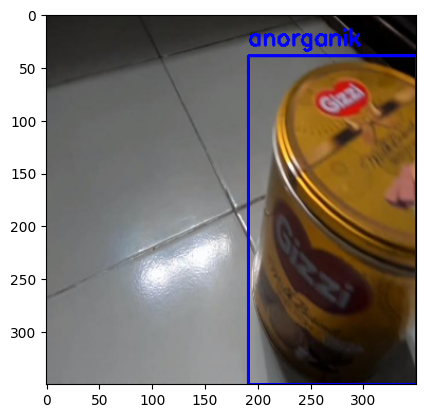

In [620]:
for bbox, label in zip(augmented_bboxes, augmented_class_labels):
    cv2.rectangle(
        augmented_image,
        (int(bbox[0]), int(bbox[1])),
        (int(bbox[2]), int(bbox[3])),
        (255, 0, 0),
        2,
    )
    cv2.putText(
        augmented_image,
        label,
        (int(bbox[0]), int(bbox[1]) - 10),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.7,
        (255, 0, 0),
        2,
    )


plt.imshow(cv2.cvtColor(augmented_image, cv2.COLOR_BGR2RGB))

#### 3.3.6 Run Augmentation

In [622]:
# Function to parse XML files and extract bounding boxes
def parse_voc_xml(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    coords = []
    class_labels = []
    for member in root.findall("object"):
        label = member.find("name").text
        xmlbox = member.find("bndbox")
        bbox = [
            int(xmlbox.find("xmin").text),
            int(xmlbox.find("ymin").text),
            int(xmlbox.find("xmax").text),
            int(xmlbox.find("ymax").text),
        ]
        coords.append(bbox)
        class_labels.append(label)

    return coords, tree


# Function to process a single image and its XML annotation
def process_image(image_path, xml_path):
    # Load the image
    image = cv2.imread(image_path)

    # Parse the XML file to get bounding boxes
    coords, tree = parse_voc_xml(xml_path)
    class_labels = [0] * len(coords)

    for x in range(10):
        # Apply the augmentation
        augmented = augmentor(image=image, bboxes=coords, class_labels=class_labels)

        augmented_image = augmented["image"]
        augmented_bboxes = augmented["bboxes"]

        # Save the augmented image and create a new XML file with the updated bounding boxes
        augmented_image_path = image_path.replace("images", "augmented_images")
        augmented_image_path = augmented_image_path.replace(".jpg", f"_{x}.jpg")
        augmented_xml_path = xml_path.replace("images", "augmented_images")
        augmented_xml_path = augmented_xml_path.replace(".xml", f"_{x}.xml")

        os.makedirs(os.path.dirname(augmented_image_path), exist_ok=True)

        cv2.imwrite(augmented_image_path, augmented_image)

        create_augmented_xml(augmented_xml_path, augmented_bboxes, tree)


# Function to create a new XML file with updated bounding boxes
def create_augmented_xml(xml_path, bboxes, original_tree):
    root = original_tree.getroot()

    for i, member in enumerate(root.findall("object")):
        bbox = member.find("bndbox")
        if i < len(bboxes):
            bbox.find("xmin").text = str(bboxes[i][0])
            bbox.find("ymin").text = str(bboxes[i][1])
            bbox.find("xmax").text = str(bboxes[i][2])
            bbox.find("ymax").text = str(bboxes[i][3])
        else:
            # If there are no bounding boxes in the augmented image for this object, set the coordinates to 0
            bbox.find("xmin").text = "0"
            bbox.find("ymin").text = "0"
            bbox.find("xmax").text = "0"
            bbox.find("ymax").text = "0"

    original_tree.write(xml_path)

In [623]:
base_dir = "workspace/images"
for root, dirs, files in os.walk(base_dir):
    for file in files:
        if file.endswith(".jpg"):
            image_path = os.path.join(root, file)
            xml_path = image_path.replace(".jpg", ".xml")

            if os.path.exists(xml_path):
                process_image(image_path, xml_path)